<a id='top'></a>

# 2) Expected Goals Modeling using Wyscout Event Data - Logistic Regression
##### Notebook to create an Expected Goals (xG) model using scikit-learn's logistic regression algorithm with a full season of publicly available [Wyscout](https://wyscout.com/) Event data

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 26/01/2021<br>
Notebook last updated: 06/02/2021

![title](../../../img/expected_goals_visual.png)

Photo credit to David Sumpter ([@Soccermatics](https://twitter.com/Soccermatics?))

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short walk-through of how to create an Expected Goals (xG) model using a season's worth of [Wyscout](https://wyscout.com/) Event data for the 'Big 5' European leagues, in [Python](https://www.python.org/), using [pandas](http://pandas.pydata.org/) DataFrames, and [scikit-learn](https://scikit-learn.org/stable/) for Machine Learning, and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
5.    [Feature Engineering](#section5)<br>
6.    [Machine Learning Modelling](#section6)<br>
7.    [Model Evaluation](#section7)<br>
8.    [Summary](#section8)<br>
9.    [Next Steps](#section9)<br>
10.    [Bibliography](#section10)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
%load_ext autoreload
%autoreload 2

# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import Arc
import seaborn as sns
#plt.style.use('seaborn-whitegrid')
import missingno as msno

# Downloading data sources
from urllib.parse import urlparse
from urllib.request import urlopen, urlretrieve
from zipfile import ZipFile, is_zipfile
from tqdm import tqdm    # Progress Bar

# Football libraries
import FCPython
#from FCPython import createPitch
import matplotsoccer
import socceraction.classification.features as features
import socceraction.classification.labels as labels
from socceraction.spadl.wyscout import convert_to_spadl
from socceraction.vaep import value

# Machine Learning
import scipy as sp
from scipy.spatial import distance
import sklearn.metrics as sk_metrics
from sklearn.ensemble import RandomForestClassifier
#from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, brier_score_loss, roc_auc_score , roc_curve, average_precision_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve, plot_calibration_curve
from xgboost import XGBClassifier   # version 1.0.2
import catboost    # pip install catboost if you don't have it
from catboost import CatBoostClassifier, Pool, cv

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_wyscout = os.path.join(base_dir, 'data', 'wyscout')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_wyscout = os.path.join(base_dir, 'scripts', 'wyscout')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_wyscout = os.path.join(base_dir, 'img', 'fig', 'wyscout')
video_dir = os.path.join(base_dir, 'video')

### Custom Functions

In [5]:
# CODE HERE

### Notebook Settings

In [6]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>

### <a id='#section2.1'>2.1. About this notebook</a>
This notebook creates an Expected Goals (xG) model using a the [publicly available 17/18 season of Wyscout match event dataset](https://figshare.com/collections/Soccer_match_event_dataset/4415000) for the 'Big 5' European leagues to create a basic Expected Goals (xG) model, using [pandas](http://pandas.pydata.org/) DataFrames, [XGBoost](https://xgboost.readthedocs.io/en/latest/) and [scikit-learn](https://scikit-learn.org/stable/) for Machine Learning, and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

**Notebook Conventions**:<br>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

**References**:<br>
This notebook also uses Wyscout data, made publicly available in the following paper by Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi, and Fosca Giannotti. **[A Public Data Set of Spatio-Temporal Match Events in Soccer Competitions](https://www.nature.com/articles/s41597-019-0247-7)**. In *Scientific Data 6*, no. 1 (2019): 1-15.

---

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Read in Data</a>
The following cells read the prepared shots DataFrame created in the first notebook that only contains the Open Play shots in the Wyscout Event data.

##### Data Dictionary
The [Wyscout](https://wyscout.com/) Events dataset has been converted to create a Shots Model.

Creation of features inspired from the notebook by Kraus Clemens ([@CleKraus](https://twitter.com/CleKraus))'s Logistic Regression xG notebook [[link](https://github.com/eddwebster/soccer_analytics/blob/master/notebooks/expected_goal_model_lr.ipynb)] and David Sumpter ([@Soccermatics](https://twitter.com/Soccermatics))'s FoT video [[link](https://www.youtube.com/watch?v=bpjLyFyLlXs)] and code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py)]..

The exported Shot Model has the following twenty features (columns) with the following definitions and data types:

| Feature     | Data type    | Description    |
|------|-----|-----|
`X (per wyscout)`    | object     | The percentage of X position in percentage from the left corner of the attacking team
`Y : (per wyscout, and after a transformation)`    | object     |  Y position in percentage from the rightcorner of the attacking team
`side_of_field`    | object     | 0 if the shot came from the right side of the field, from the perspective of the attacking team, 1 otherwise
`left_foot`    | object     | if the shot was taken with the left foot, 0 otherwise.
`right_foot`    | object     | 1 if the shot was taken with the right foot, 0 otherwise.
`right_foot`    | object     | 1 if the shot was taken with the head or body, 0 otherwise.
`counter_attack`    | object     | 1 if the shot was taken with the head or body, 0 otherwise.
`strong_foot`    | object     | 1 if the shot was taken with the player's stronger foot, 0 otherwise. This feature was an inspiration from @clekraus.
`C`    | object     | The number of meters from the center of the pitch, as calculated in David Sumpter's first Friends of Tracking Video on expected goals.
`Distance`    | object     | The number of meters from the goal, also courtesy of David Sumpter.
`in-swinging`    | object     | 1 if the shot was taken as an "in-swinger", 0 otherwise. An "in-swinger" is right footed shot from the left side of the field (relative to the attacking team), and vice versa for a left footed shot.
`out-swinging`    | object     | The opposite of in-swinging.
`prev_rebound`    | object     | 1 if the previous event was a shot, 0 otherwise.
`prev_cross`    | object     | 1 if the previous event was a cross, 0 otherwise.
`prev_touch`    | object     | 1 if the previous event was a touch, 0 otherwise.
`prev_pass`    | object     | 1 if the previous event was a pass, 0 otherwise.
`prev_smart_pass`    | object     |  1 if the previous event was a smart pass, 0 otherwise.
`free_kick`    | object     | 1 if the event shot was a free kick, 0 otherwise.
`prev_duel`    | object     | 1 if the previous event was a duel, 0 otherwise.

##### Read in engineered CSV file

In [7]:
# Read in CSV as a pandas DataFrame
df_shots = pd.read_csv(os.path.join(data_dir_wyscout, 'engineered', 'combined', 'wyscout_shots_all_1718.csv'))

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_shots

,event_id,matchPeriod,eventSec,x,y,c,distance,angle,isGoal,isCounter,isLeftFoot,isRightFoot,isHeader,isStrongFoot,side_of_field,x_before,y_before,y_after,x_after,eventId,event_name,sub_event_name,previous_event,full_name,role_name,birth_date,height,foot,season,competition_name,winner,venue,duration,cob,team,fixture,team_home,team_away,score_home_away,goals_home,goals_away,date,time,full_fixture_date
0,218431851,1H,274.719322,3.0,62.0,12.0,8.412045,0.382177,1,0,0,1,0,0,0,97.0,62.0,0.0,0.0,10,Shot,Shot,Cross,Anthony Knockaert,Midfielder,1991-11-20,172,left,17/18,Premier League,0,The American Express Community Stadium,Regular,France,Brighton & Hove Albion,Brighton & Hove Albion - AFC Bournemouth,Brighton & Hove Albion,AFC Bournemouth,2 - 2,2,2,01-01-2018,12:30:00,01-01-2018 Brighton & Hove Albion 2 v 2 AFC ...
1,218431937,1H,508.523125,24.0,25.0,25.0,29.985038,0.205332,0,0,0,1,0,1,1,76.0,25.0,0.0,0.0,10,Shot,Shot,Ground defending duel,José Heriberto Izquierdo Mena,Forward,1992-07-07,171,right,17/18,Premier League,0,The American Express Community Stadium,Regular,Colombia,Brighton & Hove Albion,Brighton & Hove Albion - AFC Bournemouth,Brighton & Hove Albion,AFC Bournemouth,2 - 2,2,2,01-01-2018,12:30:00,01-01-2018 Brighton & Hove Albion 2 v 2 AFC ...
2,218431908,1H,698.486166,11.0,40.0,10.0,13.253396,0.480355,0,0,1,0,0,0,1,89.0,40.0,100.0,100.0,10,Shot,Shot,Smart pass,Callum Wilson,Forward,1992-02-27,180,right,17/18,Premier League,0,The American Express Community Stadium,Regular,England,AFC Bournemouth,Brighton & Hove Albion - AFC Bournemouth,Brighton & Hove Albion,AFC Bournemouth,2 - 2,2,2,01-01-2018,12:30:00,01-01-2018 Brighton & Hove Albion 2 v 2 AFC ...
3,218432202,1H,1261.232640,24.0,46.0,4.0,25.333772,0.285523,1,0,0,1,0,1,1,76.0,46.0,0.0,0.0,10,Shot,Shot,Ground attacking duel,Glenn Murray,Forward,1983-09-25,185,right,17/18,Premier League,0,The American Express Community Stadium,Regular,England,Brighton & Hove Albion,Brighton & Hove Albion - AFC Bournemouth,Brighton & Hove Albion,AFC Bournemouth,2 - 2,2,2,01-01-2018,12:30:00,01-01-2018 Brighton & Hove Albion 2 v 2 AFC ...
4,218432205,1H,1264.163480,26.0,39.0,11.0,28.220781,0.249879,1,0,0,1,0,1,1,74.0,39.0,0.0,0.0,10,Shot,Shot,Touch,Davy Pröpper,Midfielder,1991-09-02,185,right,17/18,Premier League,0,The American Express Community Stadium,Regular,Netherlands,Brighton & Hove Albion,Brighton & Hove Albion - AFC Bournemouth,Brighton & Hove Albion,AFC Bournemouth,2 - 2,2,2,01-01-2018,12:30:00,01-01-2018 Brighton & Hove Albion 2 v 2 AFC ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45279,218385297,2H,1914.883786,23.0,43.0,7.0,24.574886,0.290865,0,0,0,1,0,1,1,77.0,43.0,0.0,0.0,10,Shot,Shot,Acceleration,Jay Rodriguez,Forward,1989-07-29,185,right,17/18,Premier League,0,The Hawthorns,Regular,England,West Bromwich Albion,West Bromwich Albion - Arsenal,West Bromwich Albion,Arsenal,1 - 1,1,1,31-12-2017,16:30:00,31-12-2017 West Bromwich Albion 1 v 1 Arsenal
45280,218385298,2H,1917.145753,8.0,30.0,20.0,15.477726,0.265457,1,0,1,0,0,1,1,92.0,30.0,0.0,0.0,10,Shot,Shot,Save attempt,James McClean,Midfielder,1989-04-22,180,left,17/18,Premier League,0,The Hawthorns,Regular,Northern Ireland,West Bromwich Albion,West Bromwich Albion - Arsenal,West Bromwich Albion,Arsenal,1 - 1,1,1,31-12-2017,16:30:00,31-12-2017 West Bromwich Albion 1 v 1 Arsenal
45281,218385323,2H,2010.855922,29.0,75.0,25.0,34.514707,0.187023,1,0,1,0,0,1,0,71.0,75.0,0.0,0.0,3,Free Kick,Free kick shot,Foul,James McClean,Midfielder,1989-04-22,180,left,17/18,Premier League,0,The Hawthorns,Regular,Northern Ireland,West Bromwich Albion,West Bromwich Albion - Arsenal,West Bromwich Albion,Arsenal,1 - 1,1,1,31-12-2017,16:30:00,31-12-2017 West Bromwich Albion 1 v 1 Arsenal
45282,218385236,2H,2274.902515,19.0,52.0,2.0,19.992311,0.361429,1,0,0,1,0,1,0,81.0,52.0,100.0,100.0,3,Free Kick,Free kick shot,Foul,Alexis

In [11]:
# Number of matches per sompetition, per season
df_shots.groupby(['isGoal']).event_id.count()

isGoal
0    28411
1    16873
Name: event_id, dtype: int64

In [10]:
number_of_np_shots = len(df_shots)
number_of_goals = df_shots['isGoal'].mean() * 100

print(f'Our dataset contains {number_of_np_shots:,} non-penalty shots.')
print(f"Expected Goal (xG) when shooting: {number_of_goals:.2f}%")

Our dataset contains 45,284 non-penalty shots.
Expected Goal (xG) when shooting: 37.26%


### <a id='#section3.2'>3.2. Initial Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [9]:
# Display the first 5 rows of the raw DataFrame, df_shots
df_shots.head()

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357


In [10]:
# Display the last 5 rows of the raw DataFrame, df_shots
df_shots.tail()

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
43070,253566542,2576338,2H,1152.032980,Shot,Shot,Touch,3193,5,45,116269,Diego Sebastián Laxalt Suárez,1,Genoa,0,1,1,0,0,0,5.0,6.174545,0.999010
43071,253566586,2576338,2H,1251.730517,Shot,Shot,Smart pass,3193,7,38,3548,Giuseppe Rossi,1,Genoa,0,1,1,0,0,0,12.0,10.717392,0.487547
43072,253566910,2576338,2H,2065.034482,Shot,Shot,Ground defending duel,3193,10,46,21177,Goran Pandev,1,Genoa,1,1,1,0,0,0,4.0,10.817116,0.638225
43073,253566961,2576338,2H,2367.252041,Shot,Shot,Simple pass,3193,21,32,349102,Stephane Omeonga,1,Genoa,0,1,0,1,0,0,18.0,24.961821,0.258795
43074,253567054,2576338,2H,2579.867806,Shot,Shot,Smart pass,3193,7,43,21177,Goran Pandev,1,Genoa,0,1,1,0,0,0,7.0,8.644362,0.720110


In [11]:
# Print the shape of the raw DataFrame, ddf_shots
print(df_shots.shape)

(43075, 23)


In [12]:
# Print the column names of the raw DataFrame, df_shots
print(df_shots.columns)

Index(['id', 'matchId', 'matchPeriod', 'eventSec', 'eventName', 'subEventName',
       'previous_event', 'teamId', 'X', 'Y', 'playerId', 'fullName',
       'strong_foot', 'teamName', 'Goal', 'side_of_field', 'left_foot',
       'right_foot', 'header', 'counter_attack', 'C', 'Distance', 'Angle'],
      dtype='object')


The dataset has fifty three features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [13]:
# Data types of the features of the raw DataFrame, df_shots
df_shots.dtypes

id                  int64
matchId             int64
matchPeriod        object
eventSec          float64
eventName          object
subEventName       object
previous_event     object
teamId              int64
X                   int64
Y                   int64
playerId            int64
fullName           object
strong_foot         int64
teamName           object
Goal                int64
side_of_field       int64
left_foot           int64
right_foot          int64
header              int64
counter_attack      int64
C                 float64
Distance          float64
Angle             float64
dtype: object

All six of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [14]:
# Info for the raw DataFrame, df_shots
df_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43075 entries, 0 to 43074
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43075 non-null  int64  
 1   matchId         43075 non-null  int64  
 2   matchPeriod     43075 non-null  object 
 3   eventSec        43075 non-null  float64
 4   eventName       43075 non-null  object 
 5   subEventName    43075 non-null  object 
 6   previous_event  43074 non-null  object 
 7   teamId          43075 non-null  int64  
 8   X               43075 non-null  int64  
 9   Y               43075 non-null  int64  
 10  playerId        43075 non-null  int64  
 11  fullName        43075 non-null  object 
 12  strong_foot     43075 non-null  int64  
 13  teamName        43075 non-null  object 
 14  Goal            43075 non-null  int64  
 15  side_of_field   43075 non-null  int64  
 16  left_foot       43075 non-null  int64  
 17  right_foot      43075 non-null 

In [15]:
# Description of the raw DataFrame, df_shots, showing some summary statistics for each numberical column in the DataFrame
df_shots.describe()

,id,matchId,eventSec,teamId,X,Y,playerId,strong_foot,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
count,4.307500e+04,4.307500e+04,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000,43075.000000
mean,2.152116e+08,2.493630e+06,1470.519330,2994.298967,15.230691,49.225258,94562.192548,0.646477,0.104283,0.507023,0.328009,0.509832,0.162159,0.055786,11.459083,18.400808,0.421874
std,3.082133e+07,1.627164e+05,819.909001,2876.764647,8.127936,13.773781,121103.052238,0.478069,0.305631,0.499956,0.469494,0.499909,0.368601,0.229511,7.681382,8.390679,0.253671
min,8.817865e+07,1.694390e+06,1.238426,674.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000,0.000000
25%,1.985190e+08,2.500085e+06,758.258739,1619.000000,9.000000,39.000000,11066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,12.190673,0.256104
50%,2.181876e+08,2.516831e+06,1478.164184,2462.000000,13.000000,49.000000,25714.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,16.812570,0.336414
75%,2.352420e+08,2.565839e+06,2180.689817,3766.000000,22.000000,60.000000,145692.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,17.000000,24.698178,0.516425
max,2.802175e+08,2.576338e+06,3490.826794,19830.000000,99.000000,100.000000,564512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,103.952032,2.582829


<AxesSubplot:>

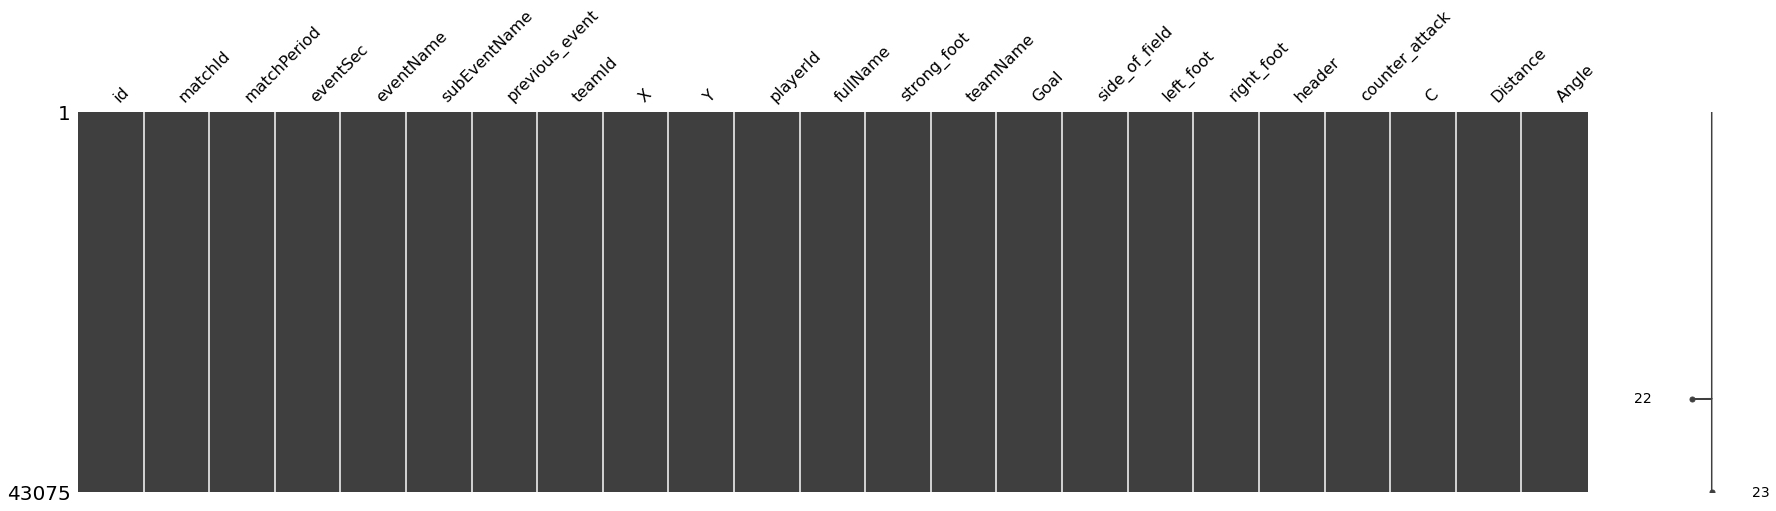

In [16]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_shots
msno.matrix(df_shots, figsize = (30, 7))

In [17]:
# Counts of missing values
null_value_stats = df_shots.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

previous_event    1
dtype: int64

The visualisation shows us very quickly that there a few missing values in the `venue` column, but otherwise the dataset is complete.

---

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Normalise the location features</a>
In order to help the learning algorithm, we rescale the location features from their original scales to a normalized scale ranging from 0 to 1. More specifically, we divide the x coordinates by 105 and the y coordinates by 68.

In [18]:
"""
df_shots['start_x_norm'] = df_shots['start_x'] / 105
df_shots['start_y_norm'] = df_shots['start_y'] / 68
df_shots['end_x_norm'] = df_shots['end_x'] / 105
df_shots['end_y_norm'] = df_shots['end_y'] / 68
"""

"\ndf_shots['start_x_norm'] = df_shots['start_x'] / 105\ndf_shots['start_y_norm'] = df_shots['start_y'] / 68\ndf_shots['end_x_norm'] = df_shots['end_x'] / 105\ndf_shots['end_y_norm'] = df_shots['end_y'] / 68\n"

In [19]:
# Display DataFrame
df_shots.head()

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357


---

## <a id='#section5'>5. Machine Learning Modelling</a>

### <a id='#section5.1'>5.1. First Attempt</a>
Train logistic regression on the training set.

In [20]:
df_shots = df_shots

##### Feature Selection
First of all, we'll just use the features that were first included in the model. We can then repeat the model to see if the added features improve the model.

In [21]:
# First of all just use the original features available
feature_cols = ['X', 
                'Y', 
                'left_foot', 
                'right_foot', 
                'header',
                'counter_attack'
               ]

"""
feature_cols = ['X', 
                'Y', 
                'side_of_field', 
                'left_foot', 
                'right_foot', 
                'header', 
                'counter_attack', 
                'strong_foot', 
                'C', 
                'Distance', 
                'Angle', 
                'out_swinging', 
                'in_swinging', 
                'rebound', 
                'prev_cross', 
                'prev_touch', 
                'prev_pass', 
                'prev_smart_pass', 
                'free_kick', 
                'prev_duel'
               ]
"""

target_col = ['Goal']

X = df_shots[feature_cols]
y = df_shots[target_col]

In [22]:
# DataFrame of Features
X.head()

,X,Y,left_foot,right_foot,header,counter_attack
0,9,29,0,1,0,0
1,29,29,0,1,0,0
2,4,57,0,1,0,0
3,4,61,0,0,1,0
4,25,33,1,0,0,0


In [23]:
# Series of Labels
y.head()

,Goal
0,0
1,0
2,0
3,0
4,0


##### Split the dataset into a train set and a test set
One of the most important concepts of machine learning is to ensure that your model is able to predict well on data that it has never seen before. Thus, in order to build and then test our model, we split our data into a training set which will be used to build the model, and a testing set that is not used to build the model, but which we use to evaluate the model's predictions.

We train our expected-goals model on 90% of the data and evaluate the model on the remaining 10% of the data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##### Train Logistic Regression model

In [25]:
reg_shitty = LogisticRegression(random_state=42)
reg_shitty.fit(X_train, np.array(y_train).ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predict on the test set

In [26]:
pred_probs = reg_shitty.predict_proba(X_test)[:,1]
pred_vals = reg_shitty.predict(X_test)

This Expected Goal model is to to return the probability that a player scores given a certain state e.g. position of the shot, counter attack, left foot.

Three commonly used metrics for measuring the performance of a model are:
*    <b>Accuracy</b> - measures the share of right and wrong decisions and does not take into consideration at all the certainty of a decision, whether you are 51% sure or 99% sure. When having unbalanced data, i.e. on outcome happens way more often than the other, it is very simple to get a good accuracy. All you need to do is to just always predict the outcome that is more likely. For this reason, Accuracy is an inappropriate metric for this model.
*    <b>Log loss</b> - when predicting probabilities the metric you should always look at is the log loss (also called binary cross entropy). As this model looks at the probability with which a goal is scored, this is an appropriate metric to assess this model.
*    <b>ROC AUC</b> (or AUC) - constructed using false positive rates and true positive rates with different thresholds etc. The AUC of a model is the probability that the model ranks a random positive example (i.e. a successful shot) more highly than a random negative example (i.e. unsuccessful shot). The problem with measuring the AUC of a xG model is that it only looks at ranking of the positive vs. the negative examples and not about the probabilities that are assigned to the examples. We, however, are interested in knowing the probability of a shot being successful. This is not captured by the AUC. The AUC however can help  communicate results to non data scientists. This notebook focusses on improving the log loss during model development, but using the AUC, we are able to say that the model has "It has a 77% chance of detecting the successful shot from the unsuccessful one", which is more understandable to non Data Scientists such as "the model has a log loss of 0.306".

In [27]:
pred_probs = reg_shitty.predict_proba(X_test)[:,1]

In [28]:
print(f'The Log Loss of the model is: {sk_metrics.log_loss(y_test, pred_probs):.5f}')

The Log Loss of the model is: 0.30744


The model has a Log Loss of 0.310. For comparison, let's compute a model that just always predicts 10.22%, i.e. the average expected goal over all shots taken (stated when data imported into model).

In [29]:
print(f'Log loss of dummy: {sk_metrics.log_loss(y_test, [0.1056]*len(y_test)):.5f}')

Log loss of dummy: 0.33797


The model is a bit better than always just predicting the average with a Log Loss of 0.322. To improve this model, we will compare the ~0.288 to other models.

In [30]:
print(f'The ROC AUC of the model: {sk_metrics.roc_auc_score(y_test, pred_probs)*100:.2f}%')

The ROC AUC of the model: 72.68%


The ROC AUC says that hen randomly selecting a successful shot and an unsuccessful shot, there is a 73.67% chance that the model gives the successful shot a higher probability than the unsuccessful shot. However, as previously stated, the AUC should not be relied on when evaluating an Expected Goals model.

Print the coefficients of logistic regression.

In [31]:
for i, col in enumerate(X_train.columns):
    print(f'Coefficient of {col}: {reg_shitty.coef_[0][i]:.3f}')

Coefficient of X: -0.148
Coefficient of Y: -0.000
Coefficient of left_foot: 0.064
Coefficient of right_foot: 0.068
Coefficient of header: -0.447
Coefficient of counter_attack: 0.395


Interpretation of the coefficients: 
1.    `X`: measured as distance from the attacker's goal. Meaning, the bigger this number the closer the attacker is to the opponent's goal. And the chance of actually making the goal raises by 4.3% with every meter the attacker is closer to the opponent's goal
2.    `Y`
4.    `left_foot`
5.    `right_foot`
6.    `header`

After building the initial model, we will no iterate over this to improve the model i.e. reduce the Log Loss
- Treat outliers
- Transform features through one-hot encoding
- Create new features from existing data
- Univariate and multivariate analysis

### <a id='#section6.2'>6.2. Treating Outliers</a>

Outliers in an XG model can be described as two types of data points:
1.    Data points that are wrong, i.e. shots that never happened
2.    Data points that are correct, i.e. shot happened in reality, but you do not want the model to learn from.

#### <a id='#section6.2.1'>6.2.1 Shot Position</a>
The the following cells, the visualisations look at the goals and shots made.

The following code is by David Sumpter ([@Soccermatics](https://twitter.com/Soccermatics)). See his video [[link](https://www.youtube.com/watch?v=bpjLyFyLlXs)] and code [[link](https://github.com/Friends-of-Tracking-Data-FoTD/SoccermaticsForPython/blob/master/3xGModel.py)].

#### Visualise Shots in the Dataset

In [32]:
# Two dimensional histogram
H_Shot = np.histogram2d(df_shots['X'], df_shots['Y'], bins=50,range=[[0, 100], [0, 100]])
goals_only = df_shots[df_shots['Goal'] == 1]
H_Goal = np.histogram2d(goals_only['X'], goals_only['Y'], bins=50,range=[[0, 100], [0, 100]])

##### Visualise Goals

In [1]:
# Plot the number of shots from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto', cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#fig.savefig('Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight")   

NameError: name 'FCPython' is not defined

##### Visualise Shots

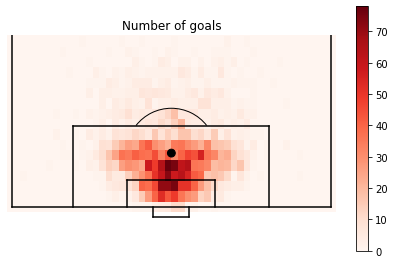

In [34]:
##### Visualise Goals
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto', cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#fig.savefig('Output/NumberOfGoals.pdf', dpi=None, bbox_inches="tight")  

##### Frequency of Scoring
Dividing the number of goals by the number of shots.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


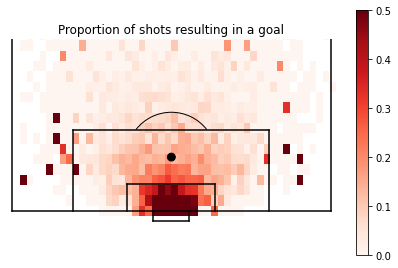

In [35]:
# Plot the probability of scoring from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto', cmap=plt.cm.Reds, vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#fig.savefig('Output/ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")   

There are data points far away from the goal that almost certainly wrong, the other might indeed have happened in a match and are therefore right. However, when e.g. looking at the cell in the right midfield: There was one shot and that shot went in. Assuming this situation indeed happened, there was most likely either no goalie or the goalie was extremely badly positioned. The attacker saw this and therefore decided to shoot but would have never shot otherwise. 

The data is required to be smooth so that the model doesn't think there's a 50% chance of scoring when shooting from the right midfield or from an acute angle to the left of the goalkeeper, outside the box.

There are three options:
1.    Delete the outliers;
2.    Use our experience and tell the model that the probability to score from this position is realistically 0. This means we change the target but leave the features as is; and
3.    Assume that the shot happened closer to the goal, but we still assume that it went in. This means that we change the features but leave the target.

There are more sophisticated ways to filter out these shots such as determining the percentage likelyhood of shooting from a position on the filter, and setting the chance to score to 0 if the player will 99 times out of 100, pass instead of shoot from that position. With this logic, we can assume that all shots happening in any of the cells with < 1% shooting probability did not result in a goal. This is an approach applied by Kraus Clemens ([@CleKraus](https://twitter.com/CleKraus)) in his Logistic Regression xG notebook [[link](https://github.com/eddwebster/soccer_analytics/blob/master/notebooks/expected_goal_model_lr.ipynb)].

In this notebook, we will just filter all shots that are more than 75m away.

In [36]:
shots_before_outlier_treatment = len(df_shots)

In [37]:
df_shots

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43070,253566542,2576338,2H,1152.032980,Shot,Shot,Touch,3193,5,45,116269,Diego Sebastián Laxalt Suárez,1,Genoa,0,1,1,0,0,0,5.0,6.174545,0.999010
43071,253566586,2576338,2H,1251.730517,Shot,Shot,Smart pass,3193,7,38,3548,Giuseppe Rossi,1,Genoa,0,1,1,0,0,0,12.0,10.717392,0.487547
43072,253566910,2576338,2H,2065.034482,Shot,Shot,Ground defending duel,3193,10,46,21177,Goran Pandev,1,Genoa,1,1,1,0,0,0,4.0,10.817116,0.638225
43073,253566961,2576338,2H,2367.252041,Shot,Shot,Simple pass,3193,21,32,349102,Stephane Omeonga,1,Genoa,0,1,0,1,0,0,18.0,24.961821,0.258795


In [38]:
# Filter all shots that are more than 75m away.
df_shots = df_shots[df_shots['Distance'] < 75]

In [39]:
shots_after_outlier_treatment = len(df_shots)

In [40]:
print(f'Shots before outlier treatment: {shots_before_outlier_treatment:,}')
print(f'Shots after outlier treatment: {shots_after_outlier_treatment:,} ({(1-(shots_after_outlier_treatment/shots_before_outlier_treatment))*100:.3f}% shots removed)')

Shots before outlier treatment: 43,075
Shots after outlier treatment: 43,052 (0.053% shots removed)


#### <a id='#section6.2.2'>6.2.2 Body Part</a>

In [41]:
df_shots.head()

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357


In [42]:
number_of_shots_all = len(df_shots)
number_of_shots_left_foot = len(df_shots[df_shots['left_foot'] == 1])
number_of_shots_right_foot = len(df_shots[df_shots['right_foot'] == 1])
number_of_shots_header = len(df_shots[df_shots['header'] == 1])

print(f'All shots: {number_of_shots_all:,}.')
print(f'Shots from right foot: {number_of_shots_right_foot:,}.')
print(f'Shots from left foot: {number_of_shots_left_foot:,}.')
print(f'Shots from head: {number_of_shots_header:,}.')

All shots: 43,052.
Shots from right foot: 21,948.
Shots from left foot: 14,124.
Shots from head: 6,980.


#### <a id='#section6.2.3'>6.2.3 Counter Attack</a>

In [43]:
number_of_shots_all = len(df_shots)
number_of_shots_counter = len(df_shots[df_shots['counter_attack'] == 1])

print(f'All shots: {number_of_shots_all:,}.')
print(f'Shots from counter attack: {number_of_shots_counter:,} ({(number_of_shots_counter/number_of_shots_all)*100:.2f})%')

All shots: 43,052.
Shots from counter attack: 2,401 (5.58)%


#### <a id='#section6.2.4'>6.2.4. Model Review</a>
Now review the impact of the Log Loss to the model after the treatment of outliers.

In [44]:
print(f'Shots before outlier treatment: {shots_before_outlier_treatment:,}')
print(f'Shots after outlier treatment: {shots_after_outlier_treatment:,} ({(1-(shots_after_outlier_treatment/shots_before_outlier_treatment))*100:.3f}% shots removed)')

Shots before outlier treatment: 43,075
Shots after outlier treatment: 43,052 (0.053% shots removed)


In [45]:
df_train, df_test, _, _ = train_test_split(df_shots, df_shots['Goal'], test_size=0.25, random_state=42)

Save the raw training and test data sets for use later on.

In [46]:
df_train_raw = df_train.copy()
df_test_raw = df_test.copy()

We re-train the logistic regression and check the log loss on the test set

In [47]:
# First of all just use the original features available
feature_cols = ['X', 
                'Y', 
                'left_foot', 
                'right_foot', 
                'header',
                'counter_attack'
               ]

target_col = ['Goal']

# training of the logistic regression on the train set
reg_outlier = LogisticRegression(random_state=42)
reg_outlier.fit(df_train[feature_cols], np.array(df_train[target_col]).ravel())

# prediction on the test set
pred_probs = reg_outlier.predict_proba(df_test[feature_cols])[:,1]
print(f"Log loss after outlier removal: {sk_metrics.log_loss(df_test['Goal'], pred_probs):.5f}")

Log loss after outlier removal: 0.30533


Good, the Log Loss increased from 0.29668 to 0.30325, i.e. it was increased by 0.6%. Given that we only changed 0.055% of the data points, this is an unexpected result. This approach should therefore be changed for one of the other approaches mentioned.

### <a id='#section6.3'>6.3. Univariate analysis</a>

In the univariate analysis part we are going to go through the variables we have already worked with and focus on the following things:
1.    Meaningfulness of features
2.    Monotonicity of continuous features
3.    One-hot encoding of categorical features

In [48]:
# ANALYSIS TO BE ADDED HER

### <a id='#section6.4'>6.4. Feature Engineering</a>
Arguably, the most important task that you have to do when building models, is the come up with good features. In this section we are therefore going to build new features and try to reduce the log loss even more.

Creation of features inspired from the notebook by Kraus Clemens ([@CleKraus](https://twitter.com/CleKraus)). See his notebook to create an Expected Goals model using Logistic Regression [[link](https://github.com/eddwebster/soccer_analytics/blob/master/notebooks/expected_goal_model_lr.ipynb)].

In [49]:
df_shots

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43070,253566542,2576338,2H,1152.032980,Shot,Shot,Touch,3193,5,45,116269,Diego Sebastián Laxalt Suárez,1,Genoa,0,1,1,0,0,0,5.0,6.174545,0.999010
43071,253566586,2576338,2H,1251.730517,Shot,Shot,Smart pass,3193,7,38,3548,Giuseppe Rossi,1,Genoa,0,1,1,0,0,0,12.0,10.717392,0.487547
43072,253566910,2576338,2H,2065.034482,Shot,Shot,Ground defending duel,3193,10,46,21177,Goran Pandev,1,Genoa,1,1,1,0,0,0,4.0,10.817116,0.638225
43073,253566961,2576338,2H,2367.252041,Shot,Shot,Simple pass,3193,21,32,349102,Stephane Omeonga,1,Genoa,0,1,0,1,0,0,18.0,24.961821,0.258795


In [50]:
# Create New Features

## Create Free Kick feature
df_shots['free_kick'] = 1*(df_shots['subEventName'] == 'Free kick shot')

## Create Rebound feature
df_shots['rebound']= 1*(df_shots['previous_event'] == 'Penalty') \
                    + 1*(df_shots['previous_event'] == 'Free kick shot') \
                    + 1*(df_shots['previous_event'] == 'Shot') \
                    + 1*(df_shots['previous_event'] == 'Save attempt') 

## Create Previous Cross feature
df_shots['prev_cross'] = 1*(df_shots['previous_event'] == 'Corner') \
                        + 1*(df_shots['previous_event'] == 'Free kick cross') \
                        + 1*(df_shots['previous_event'] == 'Cross') 

## Create Previous Touch feature
df_shots['prev_touch'] = 1*(df_shots['previous_event'] == 'Touch')

## Create Previous Pass feature
df_shots['prev_pass'] = 1*(df_shots['previous_event'] == 'Simple pass') \
                       + 1*(df_shots['previous_event'] == 'Head pass') \
                       + 1*(df_shots['previous_event'] == 'Goal kick') \

## Create Previous Smart Pass feature
df_shots['prev_smart_pass'] = 1*(df_shots['previous_event'] == 'Smart pass')

## Create Previous Duel feature
df_shots['prev_duel'] = 1*(df_shots['previous_event'] == 'Air duel') \
                       + 1*(df_shots['previous_event'] == 'Ground defending duel')  \
                       + 1*(df_shots['previous_event'] == 'Ground attacking duel') \
                       + 1*(df_shots['previous_event'] == 'Ground loose ball duel duel')

## Create attributes for In and Outswinging shots
df_shots['out_swinging'] = (1 * (df_shots['side_of_field'] == 0) * (df_shots['right_foot'] == 1) +
                               1 * (df_shots['side_of_field'] == 1) * (df_shots['left_foot'] == 1)
                              )

df_shots['in_swinging'] = (1 * (df_shots['side_of_field'] == 0) * (df_shots['left_foot'] == 1) +
                              1 * (df_shots['side_of_field'] == 1) * (df_shots['right_foot'] == 1)
                             )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [51]:
df_shots

,id,matchId,matchPeriod,eventSec,eventName,subEventName,previous_event,teamId,X,Y,playerId,fullName,strong_foot,teamName,Goal,side_of_field,left_foot,right_foot,header,counter_attack,C,Distance,Angle,free_kick,rebound,prev_cross,prev_touch,prev_pass,prev_smart_pass,prev_duel,out_swinging,in_swinging
0,88178649,1694390,1H,31.226217,Shot,Shot,Head pass,4418,9,29,25437,Blaise Matuidi,0,France,0,1,0,1,0,0,21.0,16.601958,0.257917,0,0,0,0,1,0,0,0,1
1,88178722,1694390,1H,143.119551,Shot,Shot,Simple pass,11944,29,29,83824,Mihai Doru Pintilii,1,Romania,0,1,0,1,0,0,21.0,33.369522,0.199901,0,0,0,0,1,0,0,0,1
2,88178751,1694390,1H,219.576026,Shot,Shot,Air duel,11944,4,57,33235,Bogdan Sorin Stancu,1,Romania,0,0,0,1,0,0,7.0,6.192132,0.889119,0,0,0,0,0,0,1,1,0
3,88373458,1694390,1H,247.532561,Shot,Shot,Air duel,11944,4,61,6165,Florin Andone,0,Romania,0,0,0,0,1,0,11.0,8.292316,0.506886,0,0,0,0,0,0,1,0,0
4,88178811,1694390,1H,557.319065,Shot,Shot,Simple pass,4418,25,33,3682,Antoine Griezmann,1,France,0,1,1,0,0,0,17.0,28.480959,0.236357,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43070,253566542,2576338,2H,1152.032980,Shot,Shot,Touch,3193,5,45,116269,Diego Sebastián Laxalt Suárez,1,Genoa,0,1,1,0,0,0,5.0,6.174545,0.999010,0,0,0,1,0,0,0,1,0
43071,253566586,2576338,2H,1251.730517,Shot,Shot,Smart pass,3193,7,38,3548,Giuseppe Rossi,1,Genoa,0,1,1,0,0,0,12.0,10.717392,0.487547,0,0,0,0,0,1,0,1,0
43072,253566910,2576338,2H,2065.034482,Shot,Shot,Ground defending duel,3193,10,46,21177,Goran Pandev,1,Genoa,1,1,1,0,0,0,4.0,10.817116,0.638225,0,0,0,0,0,0,1,1,0
43073,253566961,2576338,2H,2367.252041,Shot,Shot,Simple pass,3193,21,32,349102,Stephane Omeonga,1,Genoa,0,1,0,1,0,0,18.0,24.961821,0.258795,0,0,0,0,1,0,0,0,1


In [52]:
df_train, df_test, _, _ = train_test_split(df_shots, df_shots['Goal'], test_size=0.25, random_state=42)

In [53]:
# First of all just use the original features available
feature_cols = ['X', 
                'Y', 
                'left_foot', 
                'right_foot', 
                'header',
                'strong_foot',
                'counter_attack',
                'Distance',
                'Angle',
                'free_kick',
                'rebound',
                'prev_cross',
                'prev_touch',
                'prev_pass',
                'prev_smart_pass',
                'prev_duel'
               ]

target_col = ['Goal']

# Training of the logistic regression on the train set
reg_outlier = LogisticRegression(random_state=42)
reg_outlier.fit(df_train[feature_cols], np.array(df_train[target_col]).ravel())

# Prediction on the test set
pred_probs = reg_outlier.predict_proba(df_test[feature_cols])[:,1]
print(f"Log loss after feature engineering: {sk_metrics.log_loss(df_test['Goal'], pred_probs):.5f}")

Log loss after feature engineering: 0.28582


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### <a id='#section6.5'>6.5. Multivariate analysis</a>

In [54]:
number_of_shots_left_foot = len(df_shots[(df_shots['Goal'] == 1) & (df_shots['left_foot'] == 1)])
number_of_shots_right_foot = len(df_shots[(df_shots['Goal'] == 1) & (df_shots['right_foot'] == 1)])
number_of_shots_header = len(df_shots[(df_shots['Goal'] == 1) & (df_shots['header'] == 1)])

Interpretation of the coefficients: 
1.    `X`: measured as distance from the attacker's goal. Meaning, the bigger this number the closer the attacker is to the opponent's goal. And the chance of actually making the goal raises by 4.3% with every meter the attacker is closer to the opponent's goal
2.    `Y`
3.    `side_of_field`
4.    `left_foot`
5.    `right_foot`
6.    `header`
7.    `counter_attack`: After a counter attack there is a 60.5% higher chance of scoring
8.    `strong_foot`
9.    `C`
10.    `Distance`
11.    `Angle`
12.    `in_swinging`
13.    `rebound`
14.    `prev_cross`
15.    `prev_touch`
16.    `prev_pass`
17.    `prev_smart_pass`
18.    `free_kick`
19.    `prev_fuel`

---

## <a id='#section7'>7. Model Evaluation</a>
We evaluate the accuracy of our xG model by making predictions for the shots in our test set.

---

## <a id='#section8'>8. Summary</a>
This notebook is a short walkthrough of the process for building a simple Expected Goals model that produces an Expected Goals value for each shot that happened during a game of football. Our how-to is available as a Jupyter notebook and showcases some of the tools and technologies our data analytics team uses to build their analytics models and metrics.

---

## <a id='#section9'>9. Next Steps</a>
The step is to ...

---

## <a id='#section11'>10. References</a>
*    [Tom Decroos](https://twitter.com/TomDecroos), [Lotte Bransen](https://twitter.com/LotteBransen), [Jan Van Haaren](https://twitter.com/JanVanHaaren), and [Jesse Davis](https://twitter.com/jessejdavis1). [Actions Speak Louder than Goals: Valuing Player Actions in Soccer](https://arxiv.org/abs/1802.07127). In *Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining*, pp. 1851-1861. 2019.
*    Luca Pappalardo, Paolo Cintia, Alessio Rossi, Emanuele Massucco, Paolo Ferragina, Dino Pedreschi, and Fosca Giannotti. "[A Public Data Set of Spatio-Temporal Match Events in Soccer Competitions](https://www.nature.com/articles/s41597-019-0247-7)" *Scientific Data 6*, no. 1 (2019): 1-15.(https://www.nature.com/articles/s41597-019-0247-7). Scientific Data 6, no. 1 (2019): 1-15.
*    [Tech how-to: build your own Expected Goals model by SciSports](https://www.scisports.com/tech-how-to-build-your-own-expected-goals-model/)

---

## <a id='#section11'>11. Further Reading</a>
*    [The Future of Stats: xG, xA by Tifo Football Podcast](https://www.youtube.com/watch?v=sNCeA27sDvI)
*    [What is xG? YouTube video by Tifo Football](https://www.youtube.com/watch?v=zSaeaFcm1SY)
*    What are Expected Assists? YouTube video by Tifo Football](https://www.youtube.com/watch?v=1MdlkuzLdj4)
<br>

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)